<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ceros de Chebyshev e interpolación

1. Primero acotamos el error en la interpolación de $f(x) = \frac{1}{(1+x)^2}$ con $x\in[0,3]$
  *   Usando nodos (puntos para interpolar) equiespaciados
  *   Usando los nodos de Chebyshev (las raíces del polinomio de     Chebyshev)

2. Vamos a la compu e implementamos funciones para estas cotas. De esta forma podemos calcular el grado del polinomio para que el error sea menor que uno deseado.

3. Para la funcion de l item 1 calculamos polinomio interpolante segun criterio de Chebyshev de grado 4 y en nodos equiespaciados y graficamos



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.interpolate import lagrange



como $f^{(k)}(x)= (-1)^{k+1}\frac{(k+1)!}{(1+x)^{k+1}}$ tenemos como cotas para el error:

* Si usamos nodos equiespaciados en $[0,3]$ tenemos dos cotas conocidas, una mas fina que la otra
$$
|r_n(x)|\leq \frac{n!(n+2)}{4}\left(\frac{3}{n}\right)^{n+1}
$$

$$
|r_n(x)|\leq (n+2)\left(\frac{3}{2}\right)^{n+1}
$$

* si usamos como nodos las raices de Chebyshev en $[0, 3]$:
$$
|r_n(x)|\leq \frac{(n+2)}{2^{n}}\left(\frac{3}{2}\right)^{n+1}
$$


In [ ]:
def cota_equi(n):
    
    cota = factorial(n)*(n+2)/4*(3/n)**(n+1)
    
    return cota

def cota_cheby(n):

    cota = ((n+2)*(3/2)**(n+1))/(2**n)

    return cota

def cota_equi2(n):

    cota = (3/2)**(n+1)*(n+2)

    return cota

In [ ]:
cotaequi = [cota_equi(n) for n in range(1,8)]
cotaequi2 = [cota_equi2(n) for n in range(1,8)]
cotacheby = [cota_cheby(n) for n in range(1,8)]

print(cotaequi)
print(cotaequi2)
print(cotacheby)

[6.75, 6.75, 7.5, 8.54296875, 9.797759999999998, 11.25, 12.906211333227281]
[6.75, 13.5, 25.3125, 45.5625, 79.734375, 136.6875, 230.66015625]
[3.375, 3.375, 3.1640625, 2.84765625, 2.49169921875, 2.1357421875, 1.802032470703125]


Ahora calculemos el grado del polinomio interpolador (en los nodos de Chebyshev) si se desea un error de como mucho $10^{-3}$:

In [ ]:
[cota_equi(n) for n in [2,3,4,10,20]]


[6.75, 7.5, 8.54296875, 19.284931007999994, 66.74269615458773]

In [ ]:
error = 1e-3

n = 1

while cota_cheby(n) > error:
  n = n+1

print("el grado es: ", n)

el grado es:  39


Ahora vamos a calcular el polinio interpolador usando los nodos de Chebyshev. Para esto necesitamos calcular de forma automatizada los ceros!

## Implementemos una función que nos de el polinomio de Chebyshev de grado n

Versión pro! de esta función: queremos que nos devuelva un objeto polinomio de python!

In [ ]:
def Chebyshev(n):
    if n == 0:
        return(np.poly1d([1]))
    if n == 1:
        return(np.poly1d([1,0]))
    else:
        px = np.poly1d([1,0])
        return(2 * px * Chebyshev(n-1) - Chebyshev(n-2))

In [ ]:
print(Chebyshev(5))

    5      3
16 x - 20 x + 5 x


In [ ]:
Chebyshev(5)(1)

1

Como Chebyshev(n) me devuelve un objeto polinomio, le podemos pedir que nos de sus raices. Esto se llama aplicarle un metodo a un objeto de python:

In [ ]:
n = 5
raices = Chebyshev(n).r   # son las raices del polinomio T_5 en el [-1,1]

print(raices)

print([np.cos((2*k+1)*np.pi/(2*n)) for k in range(n)])

[-0.95105652 -0.58778525  0.95105652  0.58778525  0.        ]
[0.9510565162951535, 0.5877852522924731, 6.123233995736766e-17, -0.587785252292473, -0.9510565162951535]


Si queremos las raices de este polinomio en $[a,b]$ le aplicamos la transformacion $h(t)=\frac{b-a}{2}t + \frac{a+b}{2}$ a cada una de las xi calculadas en la celda de arriba:

In [ ]:
a = 0
b = 3

h = lambda x: (b-a)/2*x + (a+b)/2 # manda los x de [-1,1] al intervalo [a, b]

xi = h(raices)
print(xi)

[0.07341523 0.61832212 2.92658477 2.38167788 1.5       ]


Ahora le pedimos a python que nos fitee un polinomio (nos de un polinomio interpolador) en esos nodos. El polinomio es de grado $\leq 4$ 

podemos usar la funcion lagrange de scipy.interpolate o la funcion polyfit de numpy

In [ ]:
func = lambda x: 1/(1+x)**2


yi = func(xi)

In [ ]:
# El polinomio interpolador en estos nodos es:

P = lagrange(xi, yi)

In [ ]:
print(P)

         4          3         2
0.04335 x - 0.3511 x + 1.057 x - 1.483 x + 0.9712


In [ ]:
p2 =np.polyfit(xi, yi, n-1)
P2 = np.poly1d(p2)

print(P2)

         4          3         2
0.04335 x - 0.3511 x + 1.057 x - 1.483 x + 0.9712


El polinomio interpolador de lagrange en nodos equiespaciados del [0,3] es:

In [ ]:

def P_cheby(n, a,b, f):

  """
  Esta funcion nos devuelve el polinomio interpolador de grado <= n-1 en los n
  nodos de Chebyshev (raices de T_n) en el intervalo [a, b] para la funcion f

  inputs
  -------
  n: type int. Grado del Chebyshev
  a, b: type floats. Limites del intervalo. 
  f: type function. Funcion que queremos interpolar


  output
  ---------

  p = numpy.poly12 objeto polinomio de numpy
  """

  raices = Chebyshev(n).r
  xi =  h(raices)
  yi = f(xi)

  p = lagrange(xi, yi)

  return p

In [ ]:
P = P_cheby(5, 0, 3, func)

In [ ]:
print(P_cheby(5, 0, 3, func))

         4          3         2
0.04335 x - 0.3511 x + 1.057 x - 1.483 x + 0.9712


In [ ]:
x = np.linspace(a, b, 10000)


error_cheby = np.abs(func(x) - P(x))
np.abs(func(x) - P(x))
print("el maximo de error_cheby usando " +str(n) + " nodos es: ",np.max(error_cheby))



el maximo de error_cheby usando 5 nodos es:  0.028805399634776907


In [ ]:
cota_cheby(5)

2.49169921875

In [ ]:
err = 1e-3
x = np.linspace(a, b, 10000)

for n in range(5,100):

  p = P_cheby(n, a, b, func)

  error = np.abs(func(x)- p(x))
  error_max = np.max(error)
  print(error_max)
  if error_max <=  err:
    #print(error_max)
    break

print("el grado es: ", n)



0.028805399634776907
0.010973885276523099
0.004115224138670492
0.001524157810699478
0.0005588578938756639
el grado es:  9


In [ ]:
print(p)

          8           7          6          5         4         3
0.003045 x - 0.04347 x + 0.2649 x - 0.9051 x + 1.928 x - 2.723 x
          2
 + 2.695 x - 1.969 x + 0.9994


In [ ]:
x0 = 0.76
print("f(x0) es: ", func(x0))
print("usando el P_cheby para aproximar f(x0) obtenemos ", p(x0))
print("el error en la aproximacion es: ", np.abs(func(x0)- p(x0)))

f(x0) es:  0.3228305785123967
usando el P_cheby para aproximar f(x0) obtenemos  0.3231224822602282
el error en la aproximacion es:  0.0002919037478315012


In [ ]:
x_equi = np.linspace(a,b, n)

P_equi = lagrange(x_equi, func(x_equi))
print(P_equi)

[0.    0.375 0.75  1.125 1.5   1.875 2.25  2.625 3.   ]
          8           7          6          5         4         3
0.002512 x - 0.03585 x + 0.2204 x - 0.7685 x + 1.693 x - 2.499 x
          2
 + 2.589 x - 1.951 x + 1


In [ ]:
error_equi = np.abs(func(x) - P(x))
print("el maximo de error_equi es: ", np.max(error_equi))

el maximo de error_equi es:  0.028805399634776907


Grafiquemos $f$ y su polinomio de Lagrange en los nodos de Chebyshev y en nodos equiespaciados

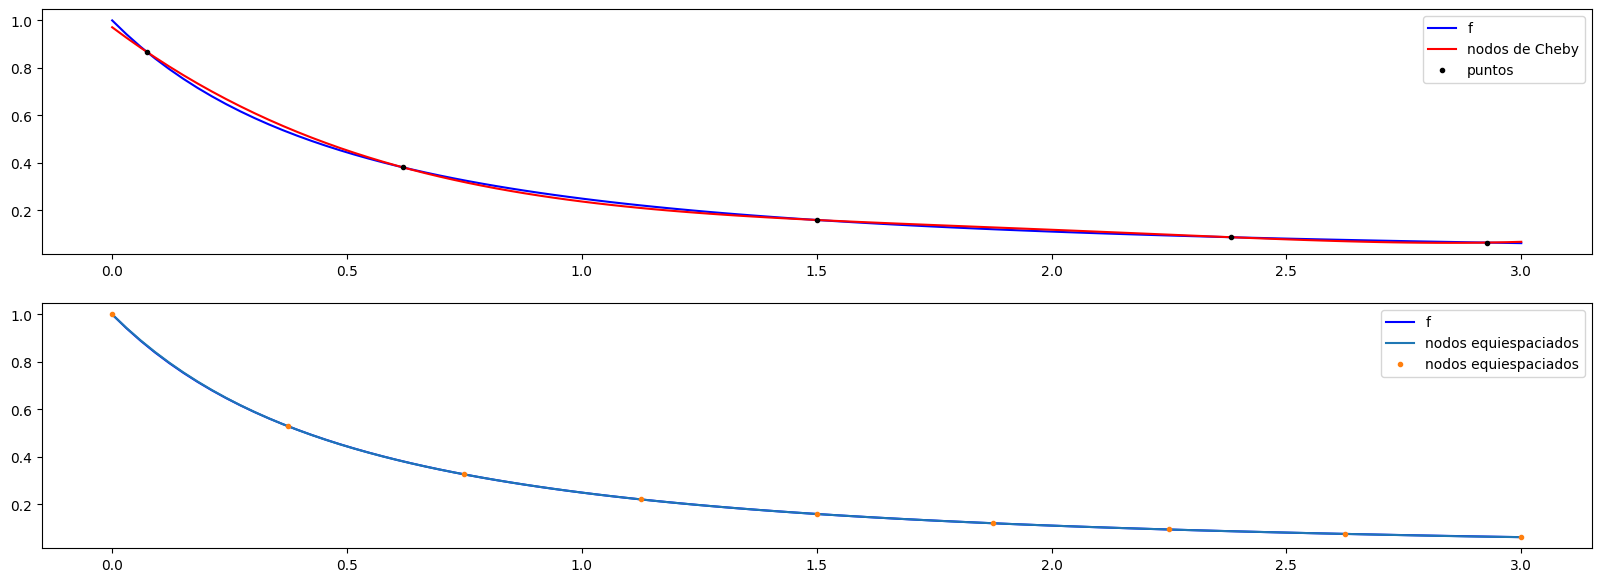

In [ ]:
grilla_x = np.linspace(a, b, 100)


plt.figure(figsize = (20, 7))
plt.subplot(2,1,1)
plt.plot(grilla_x, func(grilla_x), label = "f", color = "b")
plt.plot(grilla_x, P(grilla_x), label = "nodos de Cheby", color = "red")
plt.plot(xi, yi, '.', label ="puntos", color = "black")
plt.legend()

plt.subplot(2,1,2)
plt.plot(grilla_x, func(grilla_x), label = "f", color = "b")
plt.plot(grilla_x, P_equi(grilla_x), x_equi, func(x_equi),'.', label = "nodos equiespaciados" )
plt.legend()
plt.show()

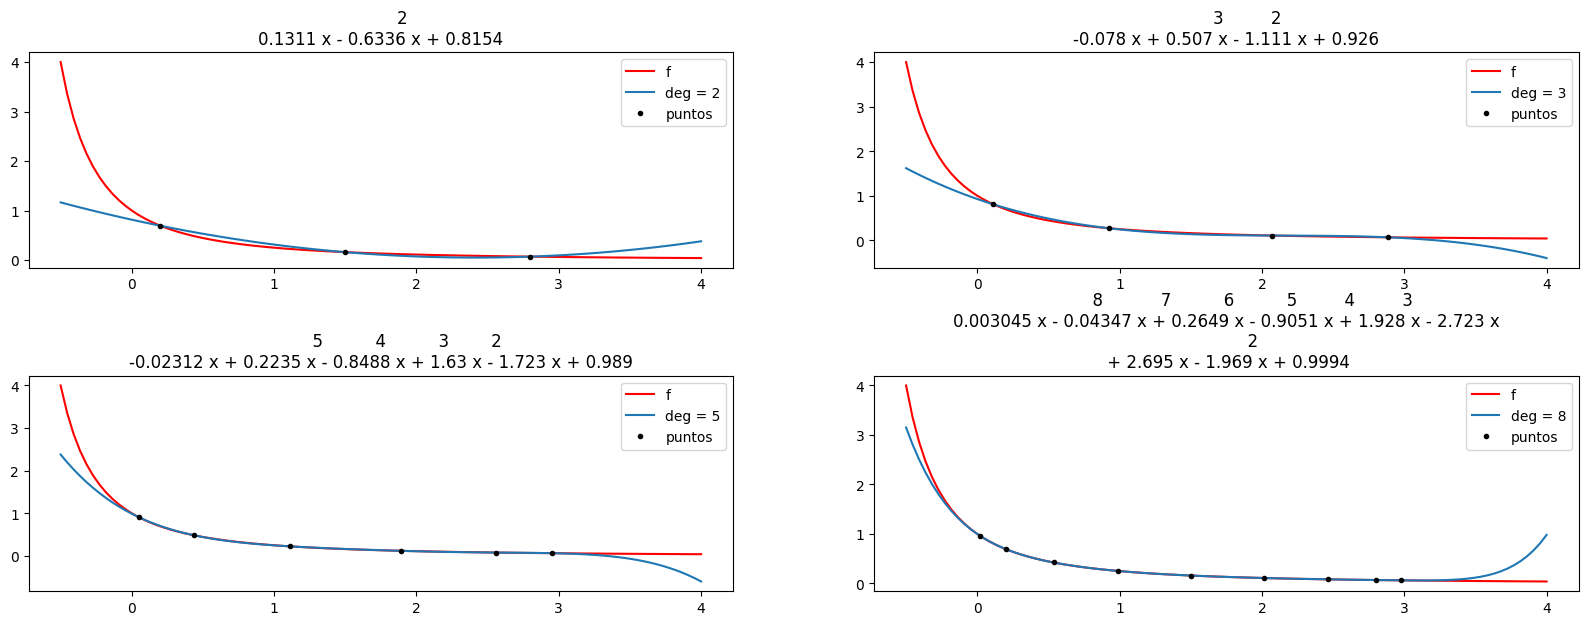

In [ ]:
# ploteemos para distintos grados: para esto definamos primero la transformacion h en forma de funcion de python:
a = 0
b = 3

grilla_x = np.linspace(-0.5, 4, 100)

grados = [2,3,5,8] 

plt.figure(figsize = (20, 7))
plt.subplots_adjust(hspace=0.5)
for i,k in enumerate(grados):
  
  raices = Chebyshev(k+1).r  #hallamos las raices del polinomio de grado k+1, eso me da k+1 nodos y me permite calcular un P_k
  xi = h(raices)
  yi = func(xi)
  
  P = lagrange(xi, yi)  # hallo el poli interpolante en los xi, yi
  

  plt.subplot(2,2,i+1)
  plt.plot(grilla_x, func(grilla_x), label = "f", color = "r")
  plt.plot(grilla_x, P(grilla_x), label = "deg = "+ str(k))
  plt.plot( xi, yi, '.', label ="puntos", color = "black")
  plt.legend()
  plt.title(str(P))

plt.show()

### Ejercicio: Hallar el polinomio interpolador en nodos de Chebyshev para $f(x) =\frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ de grado $n=2,3,5,7$ y graficarlos junto con la $f$ y los puntos de interpolacion.

Estimar usando la funcion np.max de python el error de interpolacion y calcular las cotas para cada caso. Comparar.

<p>
</p>



---



---

